# Project 7: Housing Prices: compete for the best score!

## Step 1: Preprocessing the pipeline: reading the data, and processing for further steps

In [4]:
#importing the liberaries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn import set_config

# reading the data file
housing_df = pd.read_csv("housing-classification-iter6.csv")


In [5]:
#to display all the columns in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#to display only the first 50 rows of the dataframe
housing_df.head(50)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,BsmtFinType2,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,NaN,60,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,1,8,2003.0,548,61,0,0,0,2,2008,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,Gd,ALQ,TA,TA,20,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,1,6,1976.0,460,0,0,0,0,5,2007,2,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Mn,GLQ,Gd,TA,60,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,1,6,2001.0,608,42,0,0,0,9,2008,3,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,No,ALQ,Gd,Gd,70,7,5,1915,1970,0.0,216,0,540,961,756,0,1717,1,0,1,0,1,7,1998.0,642,35,272,0,0,2,2006,4,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,Unf,Gd,SBrkr,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Av,GLQ,Gd,TA,60,8,5,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,1,9,2000.0,836,84,0,0,0,12,2008,5,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,14115,85.0,796,1,0,0,2,40,0,0,RL,Norm,GasA,Pave,Y,Wood,TA,TA,Gd,TA,No,GLQ,TA,NaN,50,5,5,1993,1995,0.0,732,0,64,796,566,0,1362,1,0,1,1,1,5,1993.0,480,30,0,320,700,10,2009,6,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,Unf,Ex,SBrkr,Typ,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,10084,75.0,1686,3,1,0,2,255,0,1,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Ex,TA,Av,GLQ,Gd,Gd,20,8,5,2004,2005,186.0,1369,0,317,1694,0,0,1694,1,0,2,0,1,7,2004.0,636,57,0,0,0,8,2007,7,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,10382,NaN,1107,3,2,0,2,235,0,0,RL,PosN,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,Mn,ALQ,TA,TA,60,7,6,1973,1973,240.0,859,32,216,1107,983,0,2090,1,0,2,1,1,7,1973.0,484,204,228,0,350,11,2009,8,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,BLQ,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,6120,51.0,952,2,2,0,2,90,0,0,RM,Artery,GasA,Pave,Y,BrkTil,TA,TA,TA,TA,No,Unf,TA,TA,50,7,5,1931,1950,0.0,0,0,952,1022,752,0,1774,0,0,2,0,2,8,1931.0,468,0,205,0,0,4,2008,9,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,Unf,Gd,FuseF,Min1,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,7420,50.0,991,2,2,0,1,0,0,0,RL,Artery,GasA,Pave,Y,BrkTil,TA,TA,TA,TA,No,GLQ,TA,TA,190,5,6,1939,1950,0.0,851,0,140,1077,0,0,1077,1,0,1,0,2,5,1939.0,205,4,0,0,0,1,2008,10,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,2fmCon,1.5Unf,Gable,Co

In [6]:
#check for null values
housing_df.isna().sum()

LotArea             0
LotFrontage       259
TotalBsmtSF         0
BedroomAbvGr        0
Fireplaces          0
PoolArea            0
GarageCars          0
WoodDeckSF          0
ScreenPorch         0
Expensive           0
MSZoning            0
Condition1          0
Heating             0
Street              0
CentralAir          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
KitchenQual         0
FireplaceQu       690
MSSubClass          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
KitchenAbvGr        0
TotRmsAbvGrd        0
GarageYrBlt        81
GarageArea          0
OpenPorchS

In [7]:
housing_features = housing_df.copy()
housing_features.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,BsmtFinType2,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,NaN,60,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,1,8,2003.0,548,61,0,0,0,2,2008,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,Gd,ALQ,TA,TA,20,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,1,6,1976.0,460,0,0,0,0,5,2007,2,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Mn,GLQ,Gd,TA,60,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,1,6,2001.0,608,42,0,0,0,9,2008,3,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,No,ALQ,Gd,Gd,70,7,5,1915,1970,0.0,216,0,540,961,756,0,1717,1,0,1,0,1,7,1998.0,642,35,272,0,0,2,2006,4,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,Unf,Gd,SBrkr,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Av,GLQ,Gd,TA,60,8,5,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,1,9,2000.0,836,84,0,0,0,12,2008,5,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Step 2: Dropping the columns which are not needed for now and Splitting the data for training/test

In [8]:
X = housing_features.drop(columns=['Utilities', 'LandSlope', 'BldgType', 'HouseStyle', 'Foundation', 'Functional', 'Heating', 'LandContour', 'SaleType', 'SaleCondition', 'Condition2', 'LotConfig', 'Neighborhood', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', "MSZoning", "Condition1", "Alley", "PoolQC", "Fence", "MiscFeature", "Id", "MoSold", "YrSold", "GarageYrBlt", "YearRemodAdd", "YearBuilt",  ])
y = X.pop("Expensive")

X.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Street,CentralAir,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,MSSubClass,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,LotShape,BsmtFinType2,HeatingQC,GarageQual,GarageCond
0,8450,65.0,856,3,0,0,2,0,0,Pave,Y,Gd,TA,Gd,TA,No,GLQ,Gd,NaN,60,7,5,196.0,706,0,150,856,854,0,1710,1,0,2,1,1,8,548,61,0,0,0,Reg,Unf,Ex,TA,TA
1,9600,80.0,1262,3,1,0,2,298,0,Pave,Y,TA,TA,Gd,TA,Gd,ALQ,TA,TA,20,6,8,0.0,978,0,284,1262,0,0,1262,0,1,2,0,1,6,460,0,0,0,0,Reg,Unf,Ex,TA,TA
2,11250,68.0,920,3,1,0,2,0,0,Pave,Y,Gd,TA,Gd,TA,Mn,GLQ,Gd,TA,60,7,5,162.0,486,0,434,920,866,0,1786,1,0,2,1,1,6,608,42,0,0,0,IR1,Unf,Ex,TA,TA
3,9550,60.0,756,3,1,0,3,0,0,Pave,Y,TA,TA,TA,Gd,No,ALQ,Gd,Gd,70,7,5,0.0,216,0,540,961,756,0,1717,1,0,1,0,1,7,642,35,272,0,0,IR1,Unf,Gd,TA,TA
4,14260,84.0,1145,4,1,0,3,192,0,Pave,Y,Gd,TA,Gd,TA,Av,GLQ,Gd,TA,60,8,5,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,1,9,836,84,0,0,0,IR1,Unf,Ex,TA,TA


In [9]:
#splitting the data for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Step 3: Categorical and Numerical split

In [70]:
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

In [71]:
X_cat.head(10)

,Street,CentralAir,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,LotShape,BsmtFinType2,HeatingQC,GarageQual,GarageCond
0,Pave,Y,TA,TA,TA,TA,No,Rec,TA,NaN,Reg,LwQ,TA,TA,TA
1,Pave,Y,TA,TA,TA,TA,No,ALQ,Gd,NaN,IR1,Unf,TA,TA,TA
2,Pave,Y,TA,TA,Gd,TA,No,GLQ,TA,TA,IR1,Unf,Gd,TA,TA
3,Pave,Y,TA,TA,TA,TA,No,GLQ,Gd,Gd,IR1,Unf,Ex,TA,TA
4,Pave,Y,Gd,TA,Gd,TA,No,ALQ,Gd,NaN,IR1,Unf,Ex,TA,TA
5,Pave,Y,TA,TA,Gd,TA,No,Unf,TA,TA,IR1,Unf,Gd,TA,TA
6,Pave,Y,TA,Gd,Gd,TA,No,ALQ,TA,NaN,IR1,Unf,Ex,TA,TA
7,Pave,Y,TA,TA,Gd,TA,No,Unf,TA,Gd,IR1,Unf,Gd,TA,TA
8,Pave,Y,TA,TA,Gd,TA,Gd,GLQ,Gd,Po,Reg,Unf,Gd,TA,TA
9,Pave,Y,TA,TA,TA,TA,No,ALQ,TA,NaN,Reg,Rec,TA,TA,TA


## Step 4: Pipeline 1 "Numerical"

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

numerical_pipe = make_pipeline(SimpleImputer())

## Step 5: Pipeline 2 "Categorical"

### Pipeline 2A "Ordinal encoding"

In [73]:
from sklearn.preprocessing import OrdinalEncoder

columns_to_ordinal = X_cat.columns.get_indexer(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                                'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'FireplaceQu', 
                                                'GarageCond', 'GarageQual', 'LotShape', 'HeatingQC'])

## explicitly determine categories for ordinal encoding

ExterQual_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
ExterCond_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtQual_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtCond_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtExposure_cats = ["N_A", "No", "Mn", "Av", "Gd"]
BsmtFinType1_cats = ["N_A", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
BsmtFinType2_cats = ["N_A", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
KitchenQual_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
FireplaceQu_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
GarageCond_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
GarageQual_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
LotShape_cats = ["N_A", "IR3", "IR2", "IR1", "Reg"]
HeatingQC_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]


cats_ord = [ExterQual_cats, ExterCond_cats, BsmtQual_cats, BsmtCond_cats, BsmtExposure_cats, 
            BsmtFinType1_cats, BsmtFinType2_cats, KitchenQual_cats, FireplaceQu_cats, GarageCond_cats, GarageQual_cats, LotShape_cats, HeatingQC_cats]

ordinal_encoder = OrdinalEncoder(categories=cats_ord)

### Pipeline 2B "One hot encoding"

In [74]:
from sklearn.preprocessing import OneHotEncoder

columns_to_ohe = X_cat.columns.get_indexer(list(set(X_cat) - set(columns_to_ordinal)))

ohe_encoder = OneHotEncoder(handle_unknown="ignore")

## Step 6: Bringing ordinal pipe and ohe pipe together

In [75]:
from sklearn.compose import ColumnTransformer

categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", ordinal_encoder, columns_to_ordinal),
        ("cat_onehot", ohe_encoder, columns_to_ohe),
    ]
)

In [76]:
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
                                 categorical_encoder)

## Step 7: Bringing together the numerical and categorical pipeline

In [77]:
final_preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numerical_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns),
    ]
)

## >> Final preprocessor: Ordinal and One Hot Encoding

In [132]:
# reading the data file
housing_df = pd.read_csv("housing-classification-iter6.csv")

#making copy
housing_features = housing_df.copy()

#dropping non necessary columns
X = housing_features.drop(columns=['Utilities', 'LandSlope', 'BldgType', 'HouseStyle', 'Foundation', 'Functional', 'Heating', 'LandContour', 'SaleType', 'SaleCondition', 'Condition2', 'LotConfig', 'Neighborhood', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', "MSZoning", "Condition1", "Alley", "PoolQC", "Fence", "MiscFeature", "Id", "MoSold", "YrSold", "GarageYrBlt", "YearRemodAdd", "YearBuilt",  ])
y = X.pop("Expensive")


#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

#numerical pipeline
numerical_pipe = make_pipeline(SimpleImputer())

#categorical pipeline: ordinal encoding
columns_to_ordinal = X_cat.columns.get_indexer(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                                'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'FireplaceQu', 
                                                'GarageCond', 'GarageQual', 'LotShape', 'HeatingQC'])

ExterQual_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
ExterCond_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtQual_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtCond_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtExposure_cats = ["N_A", "No", "Mn", "Av", "Gd"]
BsmtFinType1_cats = ["N_A", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
BsmtFinType2_cats = ["N_A", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
KitchenQual_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
FireplaceQu_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
GarageCond_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
GarageQual_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
LotShape_cats = ["N_A", "IR3", "IR2", "IR1", "Reg"]
HeatingQC_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]


cats_ord = [ExterQual_cats, ExterCond_cats, BsmtQual_cats, BsmtCond_cats, BsmtExposure_cats, 
            BsmtFinType1_cats, BsmtFinType2_cats, KitchenQual_cats, FireplaceQu_cats, GarageCond_cats, GarageQual_cats, LotShape_cats, HeatingQC_cats]

ordinal_encoder = OrdinalEncoder(categories=cats_ord)

#categorical pipeline: one hot encoding
columns_to_ohe = X_cat.columns.get_indexer(list(set(X_cat) - set(columns_to_ordinal)))

ohe_encoder = OneHotEncoder(handle_unknown="ignore")

#bringing ordinal and one hot encoding pipeline together
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", ordinal_encoder, columns_to_ordinal),
        ("cat_onehot", ohe_encoder, columns_to_ohe),
    ]
)

categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
                                 categorical_encoder)

#bringing together the numerical and categorical pipeline
final_preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numerical_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns),
    ]
)


## Step 8: Modelling with GridSearchCV or RandomizedSearchCV

### >> Dtree

In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

final_pipe_dt = make_pipeline(final_preprocessor,
                              DecisionTreeClassifier())

param_grid = {
  #  "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 16, 2),
    "decisiontreeclassifier__min_samples_leaf": range(2, 16, 2)
}

dt_search = GridSearchCV(final_pipe_dt,
                        param_grid,
                        cv=10,
                        scoring='accuracy',
                        verbose=1)

fitted_pipe = dt_search.fit(X_train, y_train)

# remember best score for comparison
scores = {"dtree" : dt_search.best_score_}

Fitting 10 folds for each of 42 candidates, totalling 420 fits


In [218]:
scores

{'dtree': 0.9306218685529031}

In [228]:
# test accuracy
train_accuracy = accuracy_score(dt_search.predict(X_train), y_train)
test_accuracy = accuracy_score(dt_search.predict(X_test), y_test)

print(f"The training accuracy is {train_accuracy} and the test accuracy is {test_accuracy}.")

The training accuracy is 0.9537671232876712 and the test accuracy is 0.9383561643835616.


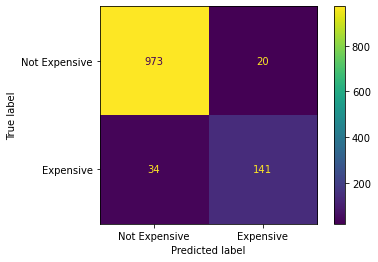

In [229]:
#conusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt_search, 
                                      X_train, 
                                      y_train, 
                                      display_labels=['Not Expensive', 'Expensive']);

In [195]:
competition_data = pd.read_csv("test-housing-classification.csv")

my_submission = pd.DataFrame(competition_data["Id"])
my_submission["Expensive"] = dt_search.predict(competition_data)

my_submission.to_csv('my_submission_Dtree.csv', index=False)

### >> KNN

In [225]:
from sklearn.neighbors import KNeighborsClassifier

final_pipe_knn = make_pipeline(final_preprocessor,
                  KNeighborsClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50),
    "kneighborsclassifier__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(final_pipe_knn,
                      param_grid,
                      cv=5,
                      scoring='accuracy',
                      verbose=1)

knn_search.fit(X_train, y_train)

# remember best score for comparison
scores["knn"] = knn_search.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [226]:
# test accuracy
train_accuracy = accuracy_score(knn_search.predict(X_train), y_train)
test_accuracy = accuracy_score(knn_search.predict(X_test), y_test)

print(f"The training accuracy is {train_accuracy} and the test accuracy is {test_accuracy}.")

The training accuracy is 0.946917808219178 and the test accuracy is 0.9041095890410958.


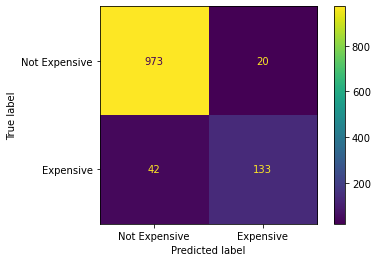

In [224]:
#conusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_search, 
                                      X_train, 
                                      y_train, 
                                      display_labels=['Not Expensive', 'Expensive']);

In [194]:
competition_data = pd.read_csv("test-housing-classification.csv")

my_submission = pd.DataFrame(competition_data["Id"])
my_submission["Expensive"] = knn_search.predict(competition_data)

my_submission.to_csv('my_submission_KNN.csv', index=False)

In [ ]:
#comparision scores

pd.DataFrame(scores, index=["best_score_"])